## CISC 520 Assignment 6

### Part 1
As we discussed in class, a common analytical optimization technique is the first derivative test. In this test,
you take the first derivative of a function and solve for its zeroes. Because of the way slope works, we know then that these points will be either a minimum or a maximum.

#### 1. Are these points global or local minima/maxima
First Derivative provides us LOCAL minimum or maximum values

#### 2.  Apply the First Derivative test to the function. How many minima/maxima does this function have? Can you identify which zeroes are a minimum and which are a maximum without graphing the function?

 $$f(x)= 3x+10*cos(x)$$

Answer: 
$$f'(x)= 3-10*sin(x)$$

Let's set f'(x)=0, then we have sin(x)=0.3. Therefore, there are infinite many minima/maxima for this function. Since Sin(x) is an alternating function, therefore x=17.5+2n*Pi are local Max, and x=17.5+ (2n+1)*Pi is local Min, where n is in Z.

#### 3. Apply the fsolve() function, as discussed in class, to write a simple program to find minima and maxima for the above function.

In [29]:
from scipy.optimize import fsolve
import math
import numpy as np

def system(coeff):
    b0= coeff
    f0=3-10*math.sin(math.radians(b0))
    return(f0)

b_guess=(0)
b0=fsolve(system,b_guess)
print("Beta0= {}".format(b0))

Beta0= [ 17.45760312]


### Part 2

#### 1. Least-Squares Regression
Using the least-squares regression module discussed in class, perform a regression analysis upon the data provided in the assignment_6.csv file on Moodle. Split the data provided into training and testing data. Use whatever means you like to determine the appropriate form of the model, $f(x)$, to use.

          X          Y
0  0.916092  10.973234
1  4.610461  63.649082
2  0.164516   8.143623
3  1.089609  13.759627
4  1.589659  15.190665
5  2.264226  23.217127
6  2.656766  27.918476
7  2.665267  28.458073
8  4.358936  56.519672
9  2.882788  26.703205
[ -0.83044318  12.66276417] 3


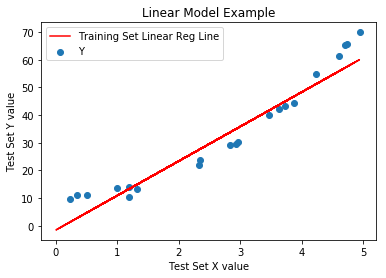

In [74]:
from scipy.optimize import leastsq
import pandas as pd
import matplotlib.pyplot as plt

#Read in the data
data=pd.read_csv("C:/Users/fatan/Downloads/assignment6.csv",names=["X","Y"]) 

#Show Data structure
print(data[0:10])

#Split Training set and testing set 
#Traning set should be around 70% to 80%
train=data[0:78]
test=data[79:100]

def residual(b,x,y):
    return b[1]*x + b[0]-y

b_guess=[0,0]
line= 12.465*train.X -1.53

#calculate the optimized parameters for training set
b,_ =leastsq(residual,b_guess,args=(test.X, test.Y))
print(b,_)

#data visulization
plt.scatter(test.X, test.Y)
plt.plot(train.X, line,"r", label= "Training Set Linear Reg Line")
plt.xlabel("Test Set X value")
plt.ylabel("Test Set Y value")
plt.title("Linear Model Example")
plt.legend()
plt.show()


#### 2.Residual Calculation
Determine the residual sum of squares, and the sum of the residuals, given both the training data and,
more importantly, the testing data, that you set aside.

RSS(Train dataset)=-1.53
Rss(Test dataset)=-0.83

### Part 3

#### Naive Bayes Classifier
In Python, implement a Naïve Bayes Classifier, as discussed in class.

In [95]:
from sklearn.naive_bayes import GaussianNB

x= np.array([[-3,7],[1,8], [1,1], [-1,0], [2,3], [-4,4], [-2,3], [1,2], [-1,4], [3,6], [-3,0], [-2,5]])
Y = np.array(["Y", "N", "Y", "Y", "Y", "N", "N", "Y", "Y", "Y", "N", "N"])
model = GaussianNB()
model.fit(x, Y)
predicted= model.predict([[1,1]])
print (predicted)

['Y']
